<a href="https://colab.research.google.com/github/jeffowino/TPMAMA-ANALYTICS/blob/main/RFM_CUSTMER_RETENTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [200]:
!pip install lifetimes

Import needed libraries

In [201]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from lifetimes.utils import *
from lifetimes import BetaGeoFitter,GammaGammaFitter
from lifetimes.plotting import plot_probability_alive_matrix, plot_frequency_recency_matrix, plot_period_transactions, plot_cumulative_transactions,plot_incremental_transactions
from lifetimes.generate_data import beta_geometric_nbd_model
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases, plot_period_transactions,plot_history_alive

Mounting the drive

In [202]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Reading in the kenya datasets

In [203]:
kenya_cust=pd.read_csv("/content/drive/MyDrive/TOP UM MAMA/Kenya Customers.csv")
kenya_del=pd.read_csv("/content/drive/MyDrive/TOP UM MAMA/Kenya Deliveries.csv")
kenya_ord=pd.read_csv("/content/drive/MyDrive/TOP UM MAMA/Kenya Orders.csv")





**CONTEXT**

Before merging the datasets,there was need to loook into the common unique identfiers that could be used to merged the dataset accordingly.

Keenly,some unique identifiers were not present in all the datasets.
**HOW DID I TACKLE THIS?**

Custmer Id was only present in the customer data but  ordersdata thus merging the two successfully yiekding a preliminary data.
The final phase involved merging the "first merged data" with the deliveries dataset succesfully by using the order ID as the unique identifier

This approach worked succesfully!

In [204]:
#merginf datasets
df=kenya_cust.merge(kenya_ord,on='Customer ID')



In [205]:
df.rename(columns={'Order ID':'Order_ID'},inplace=True)
df.head(2)

,Customer ID,Last Used Platform,Is Blocked,Created At,Language,Outstanding Amount,Loyalty Points,Number of employees,Upload restuarant location,Order_ID,Order Status,Category Name,SKU,Customization Group,Customization Option,Quantity,Unit Price,Cost Price,Total Cost Price,Total Price,Order Total,Sub Total,Tax,Delivery Charge,Tip,Discount,Remaining Balance,Payment Method,Additional Charge,Taxable Amount,Transaction ID,Currency Symbol,Transaction Status,Promo Code,Merchant ID,Store Name,Pickup Address,Description,Distance (in km),Order Time,Pickup Time,Delivery Time,Ratings,Reviews,Merchant Earning,Commission Amount,Commission Payout Status,Order Preparation Time,Debt Amount,Redeemed Loyalty Points,Consumed Loyalty Points,Cancellation Reason,Flat Discount,Checkout Template Name,Checkout Template Value
0,3365019,WEB,0,2021-04-21T07:15:56.000Z,en,0,68,NaN,NaN,11155410,COMPLETED,Cooking Fat & Oil,KKCO0620,NaN,NaN,1,4320,4270,4270,4320,6470.0,6516,-,-,-,-,0,CASH,-,-,0,KSh,NaN,NaN,893555,Topup Mama,"Kilimani, Nairobi, Kenya",NaN,20.09,2022-02-11T20:02:56.000Z,2022-02-11T20:00:32.000Z,2022-02-12T08:00:00.000Z,NaN,NaN,NaN,NaN,NaN,0,-,46,65,NaN,0,-,-
1,3365019,WEB,0,2021-04-21T07:15:56.000Z,en,0,68,NaN,NaN,11155410,COMPLETED,Flour & Sugar,KKFS0222,NaN,NaN,1,1670,1630,1630,1670,6470.0,6516,-,-,-,-,0,CASH,-,-,0,KSh,NaN,NaN,893555,Topup Mama,"Kilimani, Nairobi, Kenya",NaN,20.09,2022-02-11T20:02:56.000Z,2022-02-11T20:00:32.000Z,2022-02-12T08:00:00.000Z,NaN,NaN,NaN,NaN,NaN,0,-,46,65,NaN,0,-,-


Some columns wrere not named the same in both two groups therefore there was a need to make the name of these columns the same

In [206]:
#Writing the unique identifier to be the same since some columns in the delivery doe not match
kenya_del['Order_ID']=kenya_del['Order_ID'].str.rsplit('-', 0).str.get(1)

kenya_del.head(2)


,Task_ID,Order_ID,Relationship,Team_Name,Task_Type,Notes,Agent_ID,Agent_Name,Distance(m),Total_Time_Taken(min),Pick_up_From,Start_Before,Complete_Before,Completion_Time,Task_Status,Ref_Images,Rating,Review,Latitude,Longitude,Tags,Promo_Applied,Custom_Template_ID,Task_Details_QTY,Task_Details_AMOUNT,Special_Instructions,Tip,Delivery_Charges,Discount,Subtotal,Payment_Type,Task_Category,Earning,Pricing,Unnamed: 34,Unnamed: 35
0,368110390,"11265216,0",3.681104e+29,Default Team,Delivery,NaN,-,-,-,-,Topup Mama,17 Feb 2022 04:48:44 pm,18 Feb 2022 11:00:00 am,-,Unassigned,-,0,-,-1.2664883,36.834632,NaN,-,Order_Details,1,KSh 4400.00,-,-,-,-,-,-,-,-,-,NaN,NaN
1,368110390,"11265216,0",3.681104e+29,Default Team,Delivery,NaN,-,-,-,-,Topup Mama,17 Feb 2022 04:48:44 pm,18 Feb 2022 11:00:00 am,-,Unassigned,-,0,-,-1.2664883,36.834632,NaN,-,Order_Details,12,KSh 300.00,-,KSh 0.00,KSh 0.00,KSh 0.00,4700,CASH,-,-,-,NaN,NaN


In [207]:

kenya_del['Order_ID']=kenya_del['Order_ID'].str.rsplit(',', 0).str.get(0)

kenya_del.head(2)

,Task_ID,Order_ID,Relationship,Team_Name,Task_Type,Notes,Agent_ID,Agent_Name,Distance(m),Total_Time_Taken(min),Pick_up_From,Start_Before,Complete_Before,Completion_Time,Task_Status,Ref_Images,Rating,Review,Latitude,Longitude,Tags,Promo_Applied,Custom_Template_ID,Task_Details_QTY,Task_Details_AMOUNT,Special_Instructions,Tip,Delivery_Charges,Discount,Subtotal,Payment_Type,Task_Category,Earning,Pricing,Unnamed: 34,Unnamed: 35
0,368110390,11265216,3.681104e+29,Default Team,Delivery,NaN,-,-,-,-,Topup Mama,17 Feb 2022 04:48:44 pm,18 Feb 2022 11:00:00 am,-,Unassigned,-,0,-,-1.2664883,36.834632,NaN,-,Order_Details,1,KSh 4400.00,-,-,-,-,-,-,-,-,-,NaN,NaN
1,368110390,11265216,3.681104e+29,Default Team,Delivery,NaN,-,-,-,-,Topup Mama,17 Feb 2022 04:48:44 pm,18 Feb 2022 11:00:00 am,-,Unassigned,-,0,-,-1.2664883,36.834632,NaN,-,Order_Details,12,KSh 300.00,-,KSh 0.00,KSh 0.00,KSh 0.00,4700,CASH,-,-,-,NaN,NaN


**HEADS UP!**

One of the realizations is that one group of the dataset had the order ID containg "YR-XXXXXX,0" but the other group only had the unique ID.

Now to do this,I intelligently removed the "YR-" and ",0" from that column and then smoothly merged the dataset succesfully

In [208]:
# deliver['Order_ID']=deliver['Order_ID'].astype(str).astype(int)
kenya_del['Order_ID']=kenya_del['Order_ID'].apply(pd.to_numeric)

In [209]:
data=df.merge(kenya_del,on='Order_ID')

data.head(2)

,Customer ID,Last Used Platform,Is Blocked,Created At,Language,Outstanding Amount,Loyalty Points,Number of employees,Upload restuarant location,Order_ID,Order Status,Category Name,SKU,Customization Group,Customization Option,Quantity,Unit Price,Cost Price,Total Cost Price,Total Price,Order Total,Sub Total,Tax,Delivery Charge,Tip_x,Discount_x,Remaining Balance,Payment Method,Additional Charge,Taxable Amount,Transaction ID,Currency Symbol,Transaction Status,Promo Code,Merchant ID,Store Name,Pickup Address,Description,Distance (in km),Order Time,...,Consumed Loyalty Points,Cancellation Reason,Flat Discount,Checkout Template Name,Checkout Template Value,Task_ID,Relationship,Team_Name,Task_Type,Notes,Agent_ID,Agent_Name,Distance(m),Total_Time_Taken(min),Pick_up_From,Start_Before,Complete_Before,Completion_Time,Task_Status,Ref_Images,Rating,Review,Latitude,Longitude,Tags,Promo_Applied,Custom_Template_ID,Task_Details_QTY,Task_Details_AMOUNT,Special_Instructions,Tip_y,Delivery_Charges,Discount_y,Subtotal,Payment_Type,Task_Category,Earning,Pricing,Unnamed: 34,Unnamed: 35
0,3365019,WEB,0,2021-04-21T07:15:56.000Z,en,0,68,NaN,NaN,11155410,COMPLETED,Cooking Fat & Oil,KKCO0620,NaN,NaN,1,4320,4270,4270,4320,6470.0,6516,-,-,-,-,0,CASH,-,-,0,KSh,NaN,NaN,893555,Topup Mama,"Kilimani, Nairobi, Kenya",NaN,20.09,2022-02-11T20:02:56.000Z,...,65,NaN,0,-,-,365714001,3.657140e+29,Default Team,Delivery,NaN,1092535,Dominic Kipkemoi,0,13.35,Topup Mama,11 Feb 2022 08:00:32 pm,12 Feb 2022 08:00:00 am,12 Feb 2022 07:38:44 am,Completed,-,0,-,-1.1496162,36.947408,NaN,-,Order_Details,1,KSh 4320.00,-,-,-,-,-,-,-,0,0,NaN,NaN
1,3365019,WEB,0,2021-04-21T07:15:56.000Z,en,0,68,NaN,NaN,11155410,COMPLETED,Cooking Fat & Oil,KKCO0620,NaN,NaN,1,4320,4270,4270,4320,6470.0,6516,-,-,-,-,0,CASH,-,-,0,KSh,NaN,NaN,893555,Topup Mama,"Kilimani, Nairobi, Kenya",NaN,20.09,2022-02-11T20:02:56.000Z,...,65,NaN,0,-,-,365714001,3.657140e+29,Default Team,Delivery,NaN,1092535,Dominic Kipkemoi,0,13.35,Topup Mama,11 Feb 2022 08:00:32 pm,12 Feb 2022 08:00:00 am,12 Feb 2022 07:38:44 am,Completed,-,0,-,-1.1496162,36.947408,NaN,-,Order_Details,1,KSh 1670.00,-,-,-,-,-,-,-,0,0,NaN,NaN


**Reading in the Nigeria datasets and following the same procedure as from the kenyan datasets**

In [210]:
Nigeria_cust=pd.read_csv("/content/drive/MyDrive/TOP UM MAMA/Nigeria Customers.csv")
Nigeria_del=pd.read_csv("/content/drive/MyDrive/TOP UM MAMA/Nigeria Deliveries.csv")
Nigeria_ord=pd.read_csv("/content/drive/MyDrive/TOP UM MAMA/Nigeria Orders.csv")


In [211]:
#merginf datasets
df2=Nigeria_cust.merge(Nigeria_ord,on='Customer ID')


In [212]:
df2.rename(columns={'Order ID':'Order_ID'},inplace=True)
df2.head(2)

,Customer ID,Last Used Platform,Is Blocked,Created At,Language,Outstanding Amount,Loyalty Points,Number of Employees,Order_ID,Order Status,Category Name,SKU,Customization Group,Customization Option,Quantity,Unit Price,Cost Price,Total Cost Price,Total Price,Order Total,Sub Total,Tax,Delivery Charge,Tip,Discount,Remaining Balance,Payment Method,Additional Charge,Taxable Amount,Transaction ID,Currency Symbol,Transaction Status,Promo Code,Merchant ID,Store Name,Pickup Address,Description,Distance (in km),Order Time,Pickup Time,Delivery Time,Ratings,Reviews,Merchant Earning,Commission Amount,Commission Payout Status,Order Preparation Time,Redeemed Loyalty Points,Consumed Loyalty Points,Cancellation Reason,Flat Discount,Checkout Template Name,Checkout Template Value
0,4069636,WEB,0,2021-08-07T12:08:27.000Z,en,0,1235,4.0,11167514,COMPLETED,Flour & Sugar,KNFS0001,NaN,NaN,2,20850,20370,40740,41700,41700.0,41700,-,-,-,-,0,CASH,-,-,0,₦,NaN,NaN,1048159,Topup Mama,-,NaN,11996.7,2022-02-12T09:43:21.000Z,2022-02-12T09:44:14.000Z,2022-02-12T15:00:00.000Z,NaN,NaN,NaN,NaN,NaN,0,-,83,NaN,0,-,-
1,4069636,WEB,0,2021-08-07T12:08:27.000Z,en,0,1235,4.0,11095740,COMPLETED,Flour & Sugar,KNFS0001,NaN,NaN,2,21000,20370,40740,42000,41600.0,42000,-,-,-,-,0,CASH,-,-,0,₦,NaN,NaN,1048159,Topup Mama,-,NaN,11996.7,2022-02-08T10:36:28.000Z,2022-02-08T10:37:26.000Z,2022-02-08T15:00:00.000Z,NaN,NaN,NaN,NaN,NaN,0,80,84,NaN,0,-,-


In [213]:
#Writing the unique identifier to be the same since some columns in the delivery doe not match
Nigeria_del['Order_ID']=Nigeria_del['Order_ID'].str.rsplit('-', 0).str.get(1)

Nigeria_del.head(2)


,Task_ID,Order_ID,Relationship,Team_Name,Task_Type,Notes,Agent_ID,Distance(m),Total_Time_Taken(min),Pick_up_From,Start_Before,Complete_Before,Completion_Time,Task_Status,Ref_Images,Rating,Review,Latitude,Longitude,Tags,Promo_Applied,Custom_Template_ID,Task_Details_QTY,Task_Details_AMOUNT,Special_Instructions,Tip,Delivery_Charges,Discount,Subtotal,Payment_Type,Task_Category,Earning,Pricing
0,368032956,"11262518,0",3.680330e+29,Default Team,Delivery,NaN,1150142,-,-,Topup Mama,17 Feb 2022 12:04:02 pm,17 Feb 2022 02:30:00 pm,-,Assigned,-,0,-,6.544412,3.401738,NaN,-,Order_Details,5,₦ 104250.00,-,-,-,-,-,-,-,-,-
1,368032956,"11262518,0",3.680330e+29,Default Team,Delivery,NaN,1150142,-,-,Topup Mama,17 Feb 2022 12:04:02 pm,17 Feb 2022 02:30:00 pm,-,Assigned,-,0,-,6.544412,3.401738,NaN,-,Order_Details,1,₦ 325.00,-,₦ 0.00,₦ 0.00,₦ 0.00,104575,CASH,-,-,-


In [214]:
Nigeria_del['Order_ID']=Nigeria_del['Order_ID'].str.rsplit(',', 0).str.get(0)

Nigeria_del.head(2)

,Task_ID,Order_ID,Relationship,Team_Name,Task_Type,Notes,Agent_ID,Distance(m),Total_Time_Taken(min),Pick_up_From,Start_Before,Complete_Before,Completion_Time,Task_Status,Ref_Images,Rating,Review,Latitude,Longitude,Tags,Promo_Applied,Custom_Template_ID,Task_Details_QTY,Task_Details_AMOUNT,Special_Instructions,Tip,Delivery_Charges,Discount,Subtotal,Payment_Type,Task_Category,Earning,Pricing
0,368032956,11262518,3.680330e+29,Default Team,Delivery,NaN,1150142,-,-,Topup Mama,17 Feb 2022 12:04:02 pm,17 Feb 2022 02:30:00 pm,-,Assigned,-,0,-,6.544412,3.401738,NaN,-,Order_Details,5,₦ 104250.00,-,-,-,-,-,-,-,-,-
1,368032956,11262518,3.680330e+29,Default Team,Delivery,NaN,1150142,-,-,Topup Mama,17 Feb 2022 12:04:02 pm,17 Feb 2022 02:30:00 pm,-,Assigned,-,0,-,6.544412,3.401738,NaN,-,Order_Details,1,₦ 325.00,-,₦ 0.00,₦ 0.00,₦ 0.00,104575,CASH,-,-,-


In [215]:
# deliver['Order_ID']=deliver['Order_ID'].astype(str).astype(int)
Nigeria_del['Order_ID']=Nigeria_del['Order_ID'].apply(pd.to_numeric)

In [216]:
data2=df2.merge(Nigeria_del,on='Order_ID')

data2.head(2)

,Customer ID,Last Used Platform,Is Blocked,Created At,Language,Outstanding Amount,Loyalty Points,Number of Employees,Order_ID,Order Status,Category Name,SKU,Customization Group,Customization Option,Quantity,Unit Price,Cost Price,Total Cost Price,Total Price,Order Total,Sub Total,Tax,Delivery Charge,Tip_x,Discount_x,Remaining Balance,Payment Method,Additional Charge,Taxable Amount,Transaction ID,Currency Symbol,Transaction Status,Promo Code,Merchant ID,Store Name,Pickup Address,Description,Distance (in km),Order Time,Pickup Time,...,Commission Payout Status,Order Preparation Time,Redeemed Loyalty Points,Consumed Loyalty Points,Cancellation Reason,Flat Discount,Checkout Template Name,Checkout Template Value,Task_ID,Relationship,Team_Name,Task_Type,Notes,Agent_ID,Distance(m),Total_Time_Taken(min),Pick_up_From,Start_Before,Complete_Before,Completion_Time,Task_Status,Ref_Images,Rating,Review,Latitude,Longitude,Tags,Promo_Applied,Custom_Template_ID,Task_Details_QTY,Task_Details_AMOUNT,Special_Instructions,Tip_y,Delivery_Charges,Discount_y,Subtotal,Payment_Type,Task_Category,Earning,Pricing
0,4069636,WEB,0,2021-08-07T12:08:27.000Z,en,0,1235,4.0,11167514,COMPLETED,Flour & Sugar,KNFS0001,NaN,NaN,2,20850,20370,40740,41700,41700.0,41700,-,-,-,-,0,CASH,-,-,0,₦,NaN,NaN,1048159,Topup Mama,-,NaN,11996.7,2022-02-12T09:43:21.000Z,2022-02-12T09:44:14.000Z,...,NaN,0,-,83,NaN,0,-,-,365944018,3.659440e+29,Default Team,Delivery,NaN,1106729,3420,80.82,Topup Mama,12 Feb 2022 09:44:14 am,12 Feb 2022 03:00:00 pm,12 Feb 2022 01:39:08 pm,Completed,-,0,-,6.53291,3.395988,NaN,-,Order_Details,2,₦ 41700.00,-,₦ 0.00,₦ 0.00,₦ 0.00,41700,CASH,-,-,-
1,4069636,WEB,0,2021-08-07T12:08:27.000Z,en,0,1235,4.0,11095740,COMPLETED,Flour & Sugar,KNFS0001,NaN,NaN,2,21000,20370,40740,42000,41600.0,42000,-,-,-,-,0,CASH,-,-,0,₦,NaN,NaN,1048159,Topup Mama,-,NaN,11996.7,2022-02-08T10:36:28.000Z,2022-02-08T10:37:26.000Z,...,NaN,0,80,84,NaN,0,-,-,364425920,3.644259e+29,Default Team,Delivery,NaN,1233213,11250,97.95,Topup Mama,08 Feb 2022 10:37:26 am,08 Feb 2022 03:00:00 pm,08 Feb 2022 04:44:33 pm,Completed,-,0,-,6.53291,3.395988,NaN,-,Order_Details,2,₦ 42000.00,-,₦ 0.00,₦ 0.00,₦ 400.00,41600,CASH,-,-,-


**MERGING THE KENYA AND NIGERIA DATASETS**

Now I merged the two country's dataset using the code below.This was succesfull

In [217]:
#row-bind two DataFrames
transaction_data1 = pd.concat([data, data2])
transaction_data1.columns

Index(['Customer ID', 'Last Used Platform', 'Is Blocked', 'Created At',
       'Language', 'Outstanding Amount', 'Loyalty Points',
       'Number of employees', 'Upload restuarant location', 'Order_ID',
       'Order Status', 'Category Name', 'SKU', 'Customization Group',
       'Customization Option', 'Quantity', 'Unit Price', 'Cost Price',
       'Total Cost Price', 'Total Price', 'Order Total', 'Sub Total', 'Tax',
       'Delivery Charge', 'Tip_x', 'Discount_x', 'Remaining Balance',
       'Payment Method', 'Additional Charge', 'Taxable Amount',
       'Transaction ID', 'Currency Symbol', 'Transaction Status', 'Promo Code',
       'Merchant ID', 'Store Name', 'Pickup Address', 'Description',
       'Distance (in km)', 'Order Time', 'Pickup Time', 'Delivery Time',
       'Ratings', 'Reviews', 'Merchant Earning', 'Commission Amount',
       'Commission Payout Status', 'Order Preparation Time', 'Debt Amount',
       'Redeemed Loyalty Points', 'Consumed Loyalty Points',
       'Cancella

**HEADS UP**

One of the problem realized was that some columns were having the spaces between their names.This was a bother to python language and therefore was a need to to add "_" to the spaces on the *columns*

In [218]:
transaction_data1.columns =transaction_data1.columns.str.strip().str.replace(' ', '_')
transaction_data1.columns

Index(['Customer_ID', 'Last_Used_Platform', 'Is_Blocked', 'Created_At',
       'Language', 'Outstanding_Amount', 'Loyalty_Points',
       'Number_of_employees', 'Upload_restuarant_location', 'Order_ID',
       'Order_Status', 'Category_Name', 'SKU', 'Customization_Group',
       'Customization_Option', 'Quantity', 'Unit_Price', 'Cost_Price',
       'Total_Cost_Price', 'Total_Price', 'Order_Total', 'Sub_Total', 'Tax',
       'Delivery_Charge', 'Tip_x', 'Discount_x', 'Remaining_Balance',
       'Payment_Method', 'Additional_Charge', 'Taxable_Amount',
       'Transaction_ID', 'Currency_Symbol', 'Transaction_Status', 'Promo_Code',
       'Merchant_ID', 'Store_Name', 'Pickup_Address', 'Description',
       'Distance_(in_km)', 'Order_Time', 'Pickup_Time', 'Delivery_Time',
       'Ratings', 'Reviews', 'Merchant_Earning', 'Commission_Amount',
       'Commission_Payout_Status', 'Order_Preparation_Time', 'Debt_Amount',
       'Redeemed_Loyalty_Points', 'Consumed_Loyalty_Points',
       'Cancella

**USING RFM MODEL FOR RETENTION**

Now,with alot of keenness,since this dataset was not given with class/dependnet variable/churn status as most datasets always is labeled ,this was an inventing point for me!

I couldnt use any ML model first before coming up with way on how to create the churn status of the custmers.
This was sales dataset,therefore jumping into retention prediction could be a dangerous zone for us!

**RFM MODEL**

RFM Model for Customer Value:
Since our dataset is limited to the sales records, and didn´t include anothers information about our customers, we will use a RFM,*Recency, Frequency and Monetary Value, based model of customer value for finding our customer segments. The RFM model will take the transactions of a customer and calculate three important informational attributes about each customer:

Recency: The value of how recently a customer purchased at the establishment
Frequency: How frequent the customer’s transactions are at the establishment
Monetary value: The dollar (or pounds in our case) value of all the transactions that the customer made at the establishment
Recency
To create the recency feature variable, we need to decide the reference date for our analysis. Usually, we make use of the last transaction date plus one day. Then, we will construct the recency variable as the number of days before the reference date when a customer last made a purchase.

In [219]:
transaction_data = transaction_data1[['Order_ID','Order_Time','Total_Price']]
## convert timestamp to date; only need the day
transaction_data['date'] = pd.to_datetime(transaction_data['Order_Time']).dt.date
transaction_data = transaction_data.drop('Order_Time',axis=1)
transaction_data.head()

,Order_ID,Total_Price,date
0,11155410,4320,2022-02-11
1,11155410,4320,2022-02-11
2,11155410,4320,2022-02-11
3,11155410,1670,2022-02-11
4,11155410,1670,2022-02-11


The model is only keen on the order dates,monetory value and ID.

From the paper presented by Eangle et al ,they defined RFM model as "RFM analysis numerically ranks a customer in each of these three categories, generally on a scale of 1 to 5 (the higher the number, the better the result). The "best" customer would receive a top score in every category.
These three RFM factors can be used to reasonably predict how likely (or unlikely) it is that a customer will do business again with a firm or, in the case of a charitable organization, make another donation."

In [220]:
!pip install lifetimes
import pandas as pd
from lifetimes.utils import summary_data_from_transaction_data
summary = summary_data_from_transaction_data(transaction_data,'Order_ID','date',monetary_value_col='Total_Price',)
summary.describe()

,frequency,recency,T,monetary_value
count,4391.0,4391.0,4391.000000,4391.0
mean,0.0,0.0,22.888636,0.0
std,0.0,0.0,13.249855,0.0
min,0.0,0.0,0.000000,0.0
25%,0.0,0.0,11.000000,0.0
50%,0.0,0.0,23.000000,0.0
75%,0.0,0.0,34.000000,0.0
max,0.0,0.0,47.000000,0.0


The first step is to transform the data into three major retention or churn factors





1.   Frequency
2.   Recency

1.  Monetary value







In [221]:
summary.head()

,frequency,recency,T,monetary_value
Order_ID,,,,
10387273,0.0,0.0,47.0,0.0
10387712,0.0,0.0,47.0,0.0
10406885,0.0,0.0,46.0,0.0
10407578,0.0,0.0,46.0,0.0
10408346,0.0,0.0,46.0,0.0


The summary function converted customer transactions into an aggregated table. Many of the customers have frequency, recency, and monetary = 0,That's because Lifetimes only considers customers who have made repeat purchases into account.
Using days as time periods (can also be defined as weeks or months), variables are defined like so for the Lifetimes model:
frequency: # of days in which a customer made a repeat purchase
T: customer's purchases in days
recency: customer's purchase in days at time of most recent purchase
monetary_value: mean of a customer's purchases, excluding the 1st purchase
frequency excludes the customer's first purchase because that is considered the day the customer is born. Afterwards, you can begin to question whether or not that customer is alive.

In [223]:
from lifetimes import BetaGeoFitter
bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(summary['frequency'], summary['recency'], summary['T']);

The Lifetimes package has a function for converting transaction data into an RFM DataFrame.

**Visualizing the RFM DataFrame**

We’re going to use the Beta-Geometric/NBD (BG/NBD) model for customer churn. The BG/NBD model is an adaptation of the Pareto/NBD model. Both models describe repeat purchasing patterns in businesses where customer turnover is unobserved; however, the BG/NBD is much more computationally feasible.
Assumptions of the BG/NBD model:
A customer’s relationship has two phases: “alive” for an unobserved period of time, then “dead”
While alive, the number of transactions made by a customer follows a Poisson distribution with transaction rate lambda
Heterogeneity in lambda follows a gamma distribution
After any transaction, a customer dies with probability p; the probability that a customer dies after a number of transactions follows a geometric distribution
p follows a beta distribution
Lambda and p vary independently across customers

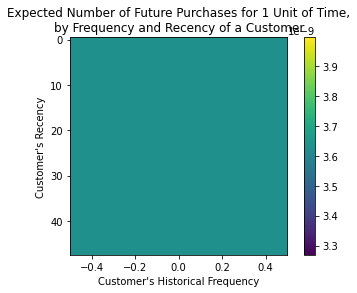

In [224]:
#plot_frequency_recency_matrix(bgf);

from matplotlib import pyplot as plt

plot_frequency_recency_matrix(bgf)
plt.show()

**Training a model and evaluating model performance**

Next we want to evaluate the model to see how well it performs in the future. I’ll split the data into a training (calibration) period and a holdout (observation) period, train the BG/NBD model and evaluate performance with four plots. These plots are:

1) Calibration period histogram: does the model fit the training data?
2) Cumulative transaction plot: does the model predict cumulative sales well?
3) Incremental transaction plot: does the model capture the overall trend in transactions?

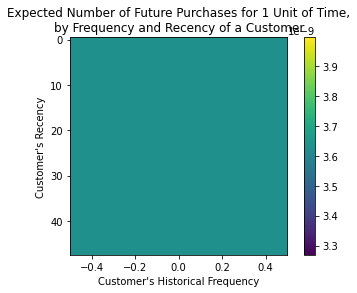

In [225]:
from lifetimes.plotting import plot_frequency_recency_matrix

plot_frequency_recency_matrix(bgf)

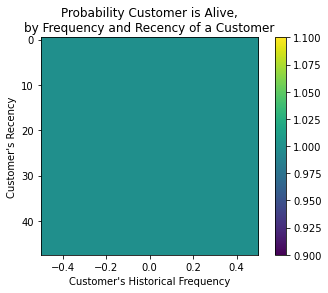

In [226]:
from lifetimes.plotting import plot_probability_alive_matrix
plot_probability_alive_matrix(bgf);

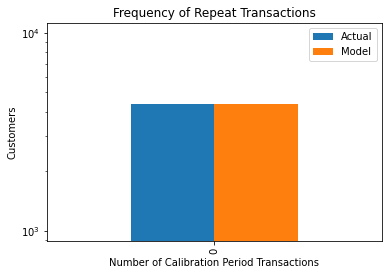

In [227]:
plot_period_transactions(bgf).set_yscale('log');

The very important observation here was that the churn and non chunr customers were equal.This means that perharps the days of the original dataset was recorded wrong ie same day or most of the customers just purchased the products the same day.According to my check,the days were not well recorded so this model will prepare us to design the churn status column using the frequency distribution.

We can assume that the customers who have churned are already lost. But what is interesting in a business setting is the customers who are at high risk for churn, but haven’t churned yet. Later on, it might still be a good idea to apply different treatments to the churned group.
If I can identify them, maybe I can encourage the marketing team to target them with promotions.

In [228]:
summary_cal_holdout = calibration_and_holdout_data(transaction_data, 'Order_ID', 'date',calibration_period_end='2022-01-31', observation_period_end='2022-02-20' )

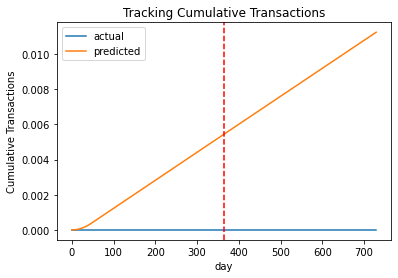

In [229]:
plot_cumulative_transactions(bgf, transaction_data, 'date', 'Order_ID', 730, 365);

The red line represents the boundary between the calibration period on the left and the holdout period on the right. As you can see, the BG/NBD model does a pretty swell job at predicting cumulative transactions except that there could be problem in the original dates that seems to be only one day time.This will make us to use another modell by designing the churn column

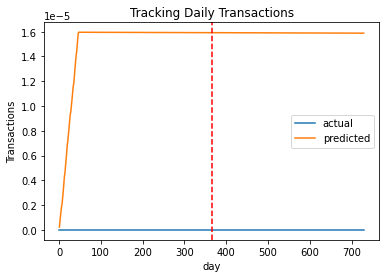

In [230]:
plot_incremental_transactions(bgf, transaction_data, 'date', 'Order_ID', 730, 365);

After thoroughly conducting the RFM model,I came to conclusion that recency was not playing a significant factor on the monetary valeu.
Therefore frquency was significant playing a very pivotal role in evaluating the churn status of the customers.
I will therefore "groupby" the dataset with Order Id as the unique identifier.

This means that,I will have the counts of the records of custmers orders

In [232]:
#Grouping the data by orderID
transaction_data.groupby('Order_ID').size().value_counts()

16      1123
4       1035
1        982
9        672
25       254
36       130
49        72
64        39
81        21
100       12
121        9
144        6
169        4
484        4
400        3
196        3
441        3
784        2
900        2
256        2
1089       2
225        2
576        2
8          1
2          1
961        1
729        1
361        1
1156       1
1296       1
dtype: int64

Renaming the count column frequency.In this table below,we make hypothesis that was arcertained by the RFM model that those custmers who had only made one order could by having a relatively higher likelihood of churn.

In statistical wise,the custmers who had made an order with Top Up Mama more than once were likely to return back and the event could continues like that

In [234]:
Frequrency=transaction_data1.groupby(["Order_ID"])["Order_ID"].count().reset_index(name="Frequency")
Frequrency

,Order_ID,Frequency
0,10387273,9
1,10387712,9
2,10406885,49
3,10407578,49
4,10408346,25
...,...,...
4386,11262052,25
4387,11262518,4
4388,11264496,1
4389,11264651,81


In [235]:
transaction_data1.head(2)

,Customer_ID,Last_Used_Platform,Is_Blocked,Created_At,Language,Outstanding_Amount,Loyalty_Points,Number_of_employees,Upload_restuarant_location,Order_ID,Order_Status,Category_Name,SKU,Customization_Group,Customization_Option,Quantity,Unit_Price,Cost_Price,Total_Cost_Price,Total_Price,Order_Total,Sub_Total,Tax,Delivery_Charge,Tip_x,Discount_x,Remaining_Balance,Payment_Method,Additional_Charge,Taxable_Amount,Transaction_ID,Currency_Symbol,Transaction_Status,Promo_Code,Merchant_ID,Store_Name,Pickup_Address,Description,Distance_(in_km),Order_Time,...,Cancellation_Reason,Flat_Discount,Checkout_Template_Name,Checkout_Template_Value,Task_ID,Relationship,Team_Name,Task_Type,Notes,Agent_ID,Agent_Name,Distance(m),Total_Time_Taken(min),Pick_up_From,Start_Before,Complete_Before,Completion_Time,Task_Status,Ref_Images,Rating,Review,Latitude,Longitude,Tags,Promo_Applied,Custom_Template_ID,Task_Details_QTY,Task_Details_AMOUNT,Special_Instructions,Tip_y,Delivery_Charges,Discount_y,Subtotal,Payment_Type,Task_Category,Earning,Pricing,Unnamed:_34,Unnamed:_35,Number_of_Employees
0,3365019,WEB,0,2021-04-21T07:15:56.000Z,en,0,68,NaN,NaN,11155410,COMPLETED,Cooking Fat & Oil,KKCO0620,NaN,NaN,1,4320,4270,4270,4320,6470.0,6516,-,-,-,-,0,CASH,-,-,0,KSh,NaN,NaN,893555,Topup Mama,"Kilimani, Nairobi, Kenya",NaN,20.09,2022-02-11T20:02:56.000Z,...,NaN,0,-,-,365714001,3.657140e+29,Default Team,Delivery,NaN,1092535,Dominic Kipkemoi,0,13.35,Topup Mama,11 Feb 2022 08:00:32 pm,12 Feb 2022 08:00:00 am,12 Feb 2022 07:38:44 am,Completed,-,0,-,-1.1496162,36.947408,NaN,-,Order_Details,1,KSh 4320.00,-,-,-,-,-,-,-,0,0,NaN,NaN,NaN
1,3365019,WEB,0,2021-04-21T07:15:56.000Z,en,0,68,NaN,NaN,11155410,COMPLETED,Cooking Fat & Oil,KKCO0620,NaN,NaN,1,4320,4270,4270,4320,6470.0,6516,-,-,-,-,0,CASH,-,-,0,KSh,NaN,NaN,893555,Topup Mama,"Kilimani, Nairobi, Kenya",NaN,20.09,2022-02-11T20:02:56.000Z,...,NaN,0,-,-,365714001,3.657140e+29,Default Team,Delivery,NaN,1092535,Dominic Kipkemoi,0,13.35,Topup Mama,11 Feb 2022 08:00:32 pm,12 Feb 2022 08:00:00 am,12 Feb 2022 07:38:44 am,Completed,-,0,-,-1.1496162,36.947408,NaN,-,Order_Details,1,KSh 1670.00,-,-,-,-,-,-,-,0,0,NaN,NaN,NaN


Now,I would like to append the Frequency data above to the original dataset so that I have back the complte dataset with ftrequency of order for the corresponding clients.

To do this,I will remove the duplicates of the origanl data which will be realized to be having the same number of rows with the frequency data since there will be no duplicates on both the datasets.

In [236]:
transaction_data4=transaction_data1.drop_duplicates("Order_ID")
transaction_data4.shape

(4391, 91)

From the realization,we see that both the two datasets had 4391 rows arcetraining accuracy of the frequency table and merging can now be done precisely

In [237]:
#merginf datasets
Churndataset=transaction_data4.merge(Frequrency,on='Order_ID')
Churndataset.head(3)

,Customer_ID,Last_Used_Platform,Is_Blocked,Created_At,Language,Outstanding_Amount,Loyalty_Points,Number_of_employees,Upload_restuarant_location,Order_ID,Order_Status,Category_Name,SKU,Customization_Group,Customization_Option,Quantity,Unit_Price,Cost_Price,Total_Cost_Price,Total_Price,Order_Total,Sub_Total,Tax,Delivery_Charge,Tip_x,Discount_x,Remaining_Balance,Payment_Method,Additional_Charge,Taxable_Amount,Transaction_ID,Currency_Symbol,Transaction_Status,Promo_Code,Merchant_ID,Store_Name,Pickup_Address,Description,Distance_(in_km),Order_Time,...,Flat_Discount,Checkout_Template_Name,Checkout_Template_Value,Task_ID,Relationship,Team_Name,Task_Type,Notes,Agent_ID,Agent_Name,Distance(m),Total_Time_Taken(min),Pick_up_From,Start_Before,Complete_Before,Completion_Time,Task_Status,Ref_Images,Rating,Review,Latitude,Longitude,Tags,Promo_Applied,Custom_Template_ID,Task_Details_QTY,Task_Details_AMOUNT,Special_Instructions,Tip_y,Delivery_Charges,Discount_y,Subtotal,Payment_Type,Task_Category,Earning,Pricing,Unnamed:_34,Unnamed:_35,Number_of_Employees,Frequency
0,3365019,WEB,0,2021-04-21T07:15:56.000Z,en,0,68,NaN,NaN,11155410,COMPLETED,Cooking Fat & Oil,KKCO0620,NaN,NaN,1,4320,4270,4270,4320,6470.0,6516,-,-,-,-,0,CASH,-,-,0,KSh,NaN,NaN,893555,Topup Mama,"Kilimani, Nairobi, Kenya",NaN,20.09,2022-02-11T20:02:56.000Z,...,0,-,-,365714001,3.657140e+29,Default Team,Delivery,NaN,1092535,Dominic Kipkemoi,0,13.35,Topup Mama,11 Feb 2022 08:00:32 pm,12 Feb 2022 08:00:00 am,12 Feb 2022 07:38:44 am,Completed,-,0,-,-1.1496162,36.947408,NaN,-,Order_Details,1,KSh 4320.00,-,-,-,-,-,-,-,0,0,NaN,NaN,NaN,9
1,3365019,WEB,0,2021-04-21T07:15:56.000Z,en,0,68,NaN,NaN,11138864,COMPLETED,Cooking Fat & Oil,KKCO0620,NaN,NaN,1,4320,4270,4270,4320,4280.0,4320,-,-,-,-,0,CASH,-,-,0,KSh,NaN,NaN,893555,Topup Mama,"Kilimani, Nairobi, Kenya",NaN,20.09,2022-02-10T22:20:24.000Z,...,0,-,-,365344477,3.653445e+29,Default Team,Delivery,NaN,1092535,Dominic Kipkemoi,1557,9.87,Topup Mama,10 Feb 2022 10:21:11 pm,11 Feb 2022 10:00:00 am,11 Feb 2022 08:12:25 am,Completed,-,0,-,-1.1496162,36.947408,NaN,-,Order_Details,1,KSh 4320.00,-,KSh 0.00,KSh 0.00,KSh 40.00,4280,CASH,-,0,0,NaN,NaN,NaN,1
2,3365770,WEB,0,2021-04-21T10:23:50.000Z,en,0,55,NaN,NaN,11253217,COMPLETED,Cooking Fat & Oil,KKCO0487,NaN,NaN,1,4400,4250,4250,4400,5415.0,5485,-,-,-,-,0,CASH,-,-,0,KSh,NaN,NaN,893555,Topup Mama,"Kilimani, Nairobi, Kenya",Deliver tomorrow morning by 6.00a.m,4.49,2022-02-16T20:50:20.000Z,...,0,-,-,367759097,3.677591e+29,Default Team,Delivery,Deliver tomorrow morning by 6.00a.m,1114991,Simon Gichu,-,6.55,Topup Mama,16 Feb 2022 08:47:52 pm,17 Feb 2022 08:00:00 am,17 Feb 2022 06:10:30 am,Completed,-,0,-,-1.287314,36.805498,NaN,-,Order_Details,1,KSh 4400.00,-,-,-,-,-,-,-,0,0,NaN,NaN,NaN,9


We have now managed to merged the two important datasets.
Now,accordingly the next thing is to categorized the frequency column to assume 'churn' for any value less than or equal to one and 'Retained' for any frequency value greater than 1.This was justifed statistically from the RFM models 

In [238]:
Churndataset['Frequency'] = np.where( Churndataset.Frequency > 1, 'Retained', 'Churn') # Classify price above 1000 or less
Churndataset.head(3)

,Customer_ID,Last_Used_Platform,Is_Blocked,Created_At,Language,Outstanding_Amount,Loyalty_Points,Number_of_employees,Upload_restuarant_location,Order_ID,Order_Status,Category_Name,SKU,Customization_Group,Customization_Option,Quantity,Unit_Price,Cost_Price,Total_Cost_Price,Total_Price,Order_Total,Sub_Total,Tax,Delivery_Charge,Tip_x,Discount_x,Remaining_Balance,Payment_Method,Additional_Charge,Taxable_Amount,Transaction_ID,Currency_Symbol,Transaction_Status,Promo_Code,Merchant_ID,Store_Name,Pickup_Address,Description,Distance_(in_km),Order_Time,...,Flat_Discount,Checkout_Template_Name,Checkout_Template_Value,Task_ID,Relationship,Team_Name,Task_Type,Notes,Agent_ID,Agent_Name,Distance(m),Total_Time_Taken(min),Pick_up_From,Start_Before,Complete_Before,Completion_Time,Task_Status,Ref_Images,Rating,Review,Latitude,Longitude,Tags,Promo_Applied,Custom_Template_ID,Task_Details_QTY,Task_Details_AMOUNT,Special_Instructions,Tip_y,Delivery_Charges,Discount_y,Subtotal,Payment_Type,Task_Category,Earning,Pricing,Unnamed:_34,Unnamed:_35,Number_of_Employees,Frequency
0,3365019,WEB,0,2021-04-21T07:15:56.000Z,en,0,68,NaN,NaN,11155410,COMPLETED,Cooking Fat & Oil,KKCO0620,NaN,NaN,1,4320,4270,4270,4320,6470.0,6516,-,-,-,-,0,CASH,-,-,0,KSh,NaN,NaN,893555,Topup Mama,"Kilimani, Nairobi, Kenya",NaN,20.09,2022-02-11T20:02:56.000Z,...,0,-,-,365714001,3.657140e+29,Default Team,Delivery,NaN,1092535,Dominic Kipkemoi,0,13.35,Topup Mama,11 Feb 2022 08:00:32 pm,12 Feb 2022 08:00:00 am,12 Feb 2022 07:38:44 am,Completed,-,0,-,-1.1496162,36.947408,NaN,-,Order_Details,1,KSh 4320.00,-,-,-,-,-,-,-,0,0,NaN,NaN,NaN,Retained
1,3365019,WEB,0,2021-04-21T07:15:56.000Z,en,0,68,NaN,NaN,11138864,COMPLETED,Cooking Fat & Oil,KKCO0620,NaN,NaN,1,4320,4270,4270,4320,4280.0,4320,-,-,-,-,0,CASH,-,-,0,KSh,NaN,NaN,893555,Topup Mama,"Kilimani, Nairobi, Kenya",NaN,20.09,2022-02-10T22:20:24.000Z,...,0,-,-,365344477,3.653445e+29,Default Team,Delivery,NaN,1092535,Dominic Kipkemoi,1557,9.87,Topup Mama,10 Feb 2022 10:21:11 pm,11 Feb 2022 10:00:00 am,11 Feb 2022 08:12:25 am,Completed,-,0,-,-1.1496162,36.947408,NaN,-,Order_Details,1,KSh 4320.00,-,KSh 0.00,KSh 0.00,KSh 40.00,4280,CASH,-,0,0,NaN,NaN,NaN,Churn
2,3365770,WEB,0,2021-04-21T10:23:50.000Z,en,0,55,NaN,NaN,11253217,COMPLETED,Cooking Fat & Oil,KKCO0487,NaN,NaN,1,4400,4250,4250,4400,5415.0,5485,-,-,-,-,0,CASH,-,-,0,KSh,NaN,NaN,893555,Topup Mama,"Kilimani, Nairobi, Kenya",Deliver tomorrow morning by 6.00a.m,4.49,2022-02-16T20:50:20.000Z,...,0,-,-,367759097,3.677591e+29,Default Team,Delivery,Deliver tomorrow morning by 6.00a.m,1114991,Simon Gichu,-,6.55,Topup Mama,16 Feb 2022 08:47:52 pm,17 Feb 2022 08:00:00 am,17 Feb 2022 06:10:30 am,Completed,-,0,-,-1.287314,36.805498,NaN,-,Order_Details,1,KSh 4400.00,-,-,-,-,-,-,-,0,0,NaN,NaN,NaN,Retained


In [239]:
import seaborn as sns
import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

We can do some exploratory analysis on churn status of theclients based on the days.This could helps understand the dates or days where our clients were coming over to buy the products

In [240]:
fig = px.histogram(Churndataset, x="Frequency", color="Order_Time", title="<b>Order Date distribution vs Churn</b>")
fig.update_layout(width=900, height=600, bargap=0.1)
fig.show()

In [241]:
!pip install datasist

In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pp
import seaborn as sb
import datasist as ds

import warnings
warnings.filterwarnings(action='ignore')

Total price plays a very important role,and there its statistical distribution was assesed as show below

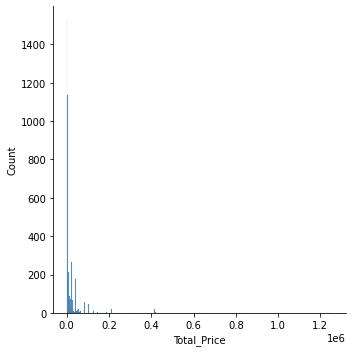

In [243]:
sb.displot(Churndataset['Total_Price'])

In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
%matplotlib inline

In [245]:
Churndataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4391 entries, 0 to 4390
Data columns (total 92 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_ID                 4391 non-null   int64  
 1   Last_Used_Platform          4391 non-null   object 
 2   Is_Blocked                  4391 non-null   int64  
 3   Created_At                  4391 non-null   object 
 4   Language                    4391 non-null   object 
 5   Outstanding_Amount          4391 non-null   int64  
 6   Loyalty_Points              4391 non-null   int64  
 7   Number_of_employees         2429 non-null   float64
 8   Upload_restuarant_location  2 non-null      object 
 9   Order_ID                    4391 non-null   int64  
 10  Order_Status                4391 non-null   object 
 11  Category_Name               4391 non-null   object 
 12  SKU                         4391 non-null   object 
 13  Customization_Group         0 non

**selecting only variables to be used in modelling**

The dataset contained many varibles that could not significantly be used in modelling.Therefore there was need to selct these variables out

In [246]:
modellingdata=Churndataset[['Task_Details_QTY','Order_Status','Category_Name','Unit_Price','Cost_Price','Total_Cost_Price','Total_Price','Distance_(in_km)','Loyalty_Points','Frequency']]
modellingdata.to_csv('Modellingdata.csv')

In [247]:
#one_hot_encoded= pd.get_dummies(modellingdata)
#one_hot_encoded.head()

**Label encoding the categorical values in the data set which are not numeric**

In [257]:
from sklearn.preprocessing import LabelEncoder as LE

In [262]:
modellingdata2=modellingdata2[['Order_Status','Category_Name','Unit_Price','Total_Price','Distance_(in_km)','Loyalty_Points','Frequency']]


**dividing into x(predictor) and y(target) variables**

In [ ]:
x=modellingdata2.iloc[:,[0,1,2,3,4,5,6,7,8]].values
y=modellingdata2.iloc[:,9].values


splitting into train and test dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)

In [ ]:
len(x_train)

In [ ]:
len(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

creating the model using classification algorithms

In [ ]:
model1=RandomForestClassifier().fit(x_train,y_train)
accuracy_score=model1.score(x_test,y_test)
accuracy_score

In [ ]:
from sklearn.tree import DecisionTreeClassifier

**DecisionTreeClassifier**

In [ ]:
model2=DecisionTreeClassifier().fit(x_train,y_train)
accuracy_score=model2.score(x_test,y_test)
accuracy_score

**xgboost**

In [ ]:
model3=XGBRFClassifier().fit(x_train,y_train)
accuracy_score=model3.score(x_test,y_test)
accuracy_score

**KNN**

In [ ]:
model5=KNeighborsClassifier().fit(x_train,y_train)
accuracy_score=model5.score(x_test,y_test)
accuracy_score

**validation; testing the model**

In [ ]:
pred=model3.predict([[1,0,0,0,0,3,53.85,108.15]])
pred

The ensemble model perfomed relatively well as compared with other classification models that was used giving oput approximately 80% accuracy value